## Face Detection with Haar Cascades¶
#### Note: This is face detection NOT face recognition. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!



In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [2]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

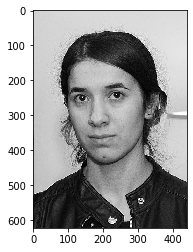

In [3]:
plt.imshow(nadia,cmap='gray')

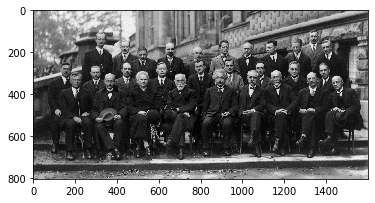

In [4]:
plt.imshow(solvay,cmap='gray')

## Cascade Files
#### OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [5]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

In [9]:
result1 = detect_face(nadia)

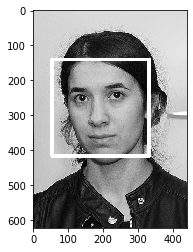

In [10]:
plt.imshow(result1,cmap='gray')

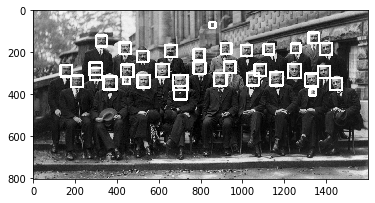

In [12]:
# Gets errors!
result2 = detect_face(solvay)
plt.imshow(result2,cmap='gray')

In [13]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img

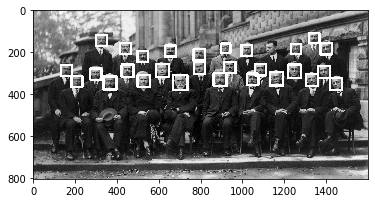

In [15]:
# Doesn't detect the side face.
result3 = adj_detect_face(solvay)
plt.imshow(result3,cmap='gray')

## Eye Cascade File

In [16]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascade_eye.xml')

In [17]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

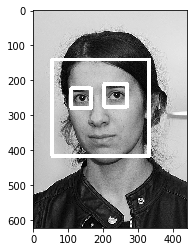

In [18]:
result4 = detect_eyes(result1)
plt.imshow(result4,cmap='gray')

# OpenCV Connecting to a USB Camera or a Laptop Camera

OpenCV can automatically connect to your laptop's built in camera or your USB camera if you've installed that specific USB camera drivers. Please keep in mind, its almost impossible for us to help troubleshoot this sort of physical connection on our end, so if you are not able to connect, please check out the troubleshooting tips here:

* https://github.com/opencv/opencv/issues/8471

### Notebook Users may need to restart the kernel after closing the camera window!

In [64]:
## PUT THIS ALL IN ONE CELL!

import cv2


# Connects to your computer's default camera
cap = cv2.VideoCapture(0)

face_cascade = cv2.CascadeClassifier('../DATA/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascade_eye.xml')
# Automatically grab width and height from video feed
# (returns float which we need to convert to integer for later on!)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    
    # Capture frame-by-frame
    ret, gray = cap.read()

    # Our operations on the frame come here
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    face_rects = face_cascade.detectMultiScale(gray,scaleFactor=1.2, minNeighbors=5)
    for (x,y,w,h) in face_rects: 
        roi = cv2.rectangle(gray, (x,y), (x+w,y+h), (255,255,255), 10)
        eyes = eye_cascade.detectMultiScale(roi)
        for (x,y,w,h) in eyes: 
            cv2.rectangle(roi, (x,y), (x+w,y+h), (255,255,255), 10)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    
    # This command let's us quit with the "q" button on a keyboard.
    # Simply pressing X on the window won't work!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture and destroy the windows
cap.release()
cv2.destroyAllWindows()

Make sure to check StackOverflow if you are encountering issues, as this is particularly tricky to help debug through online QA support.